<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.4.0


### GitHub + Colab

In [ ]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 15), reused 42 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
#GitHub Colab directory
# Directories for files
map_file = '/content/DL_Assg2/mapping.csv'
dataset_file = '/content/DL_Assg2/dataset.csv'

In [ ]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [ ]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv(map_file, delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [ ]:
# load the dataset
dat = pd.read_csv(dataset_file, delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

dat.head()

,TEXT,Label
0,Been friends since 7th grade. Look at us now w...,0
1,This is what it looks like when someone loves ...,1
2,RT @user this white family was invited to a Bl...,1
3,"Westenders @user #LAZzNation @ Weston, Toronto\n",2
4,Maxwell heads home @ Summa Akron City Hospital\n,0


In [ ]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [ ]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

def vectorize_sequences(sequences, dimension=5):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

X = pad_sequences(sequences, maxlen=max_len)
y = vectorize_sequences(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546, 5)


### 1.3 Data Sampling

In [ ]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### gLove twitter 200d #PRE-1 FROZEN

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 217,797
Non-trainable params: 2,000,000
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 54s 4ms/step - loss: 1.2430 - acc: 0.5029 - val_loss: 1.1693 - val_acc: 0.5401
Epoch 2/10
13614/13614 [==============================] - 55s 4ms/step - loss: 1.0959 - acc: 0.5710 - val_loss: 1.1525 - val_acc: 0.5520
Epoch 3/10
13614/13614 [==============================] - 55s 4ms/step - loss: 1.0183 - acc: 0.6105 - val_loss: 1.1566 - val_acc: 0.5580
Epoch 4/10
13614/13614 [==============================] - 54s 4ms/step - loss: 0.9562 - acc: 0.6384 - val_loss: 1.2056 - val_acc: 0.5667
Epoch 5/10
13614/13614 [==============================] - 54s 4ms/step - loss: 0.9030 - acc: 0.6643 - val_loss: 1.2283 - val_acc: 0.5513
Epoch 6/10
13614/13614 [==============================] - 54s 4ms/step - loss: 0.8533 - acc: 0.6890 - val_loss: 1.2730 - val_acc: 0.5649
Epoch 7/10
13614/13614 [==============================] - 54s 4ms/step - loss: 0.8102 - acc: 0.7078 - val_loss: 1.2987 - val_acc: 0.5513
Epoch 8/10
13614/13614 [=================

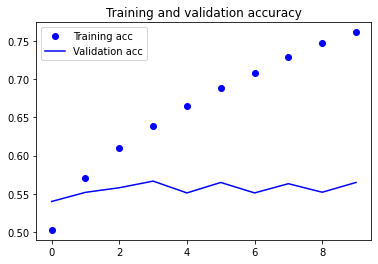

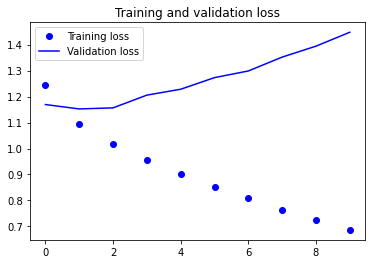

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_PRE1.h5')
model.save('text_model_gLove200d_PRE1.h5')

### gLove twitter 200d #1 unfrozen

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 118s 9ms/step - loss: 1.1536 - acc: 0.5392 - val_loss: 1.0356 - val_acc: 0.5855
Epoch 2/10
13614/13614 [==============================] - 133s 10ms/step - loss: 0.9473 - acc: 0.6242 - val_loss: 1.0170 - val_acc: 0.6096
Epoch 3/10
13614/13614 [==============================] - 134s 10ms/step - loss: 0.8630 - acc: 0.6650 - val_loss: 1.0223 - val_acc: 0.6024
Epoch 4/10
13614/13614 [==============================] - 133s 10ms/step - loss: 0.8038 - acc: 0.6942 - val_loss: 1.0796 - val_acc: 0.6113
Epoch 5/10
13614/13614 [==============================] - 134s 10ms/step - loss: 0.7547 - acc: 0.7139 - val_loss: 1.0571 - val_acc: 0.6094
Epoch 6/10
13614/13614 [==============================] - 132s 10ms/step - loss: 0.7098 - acc: 0.7357 - val_loss: 1.1123 - val_acc: 0.6159
Epoch 7/10
13614/13614 [==============================] - 132s 10ms/step - loss: 0.6695 - acc: 0.7552 - val_loss: 1.1476 - val_acc: 0.6068
Epoch 8/10
13614/13614 [====

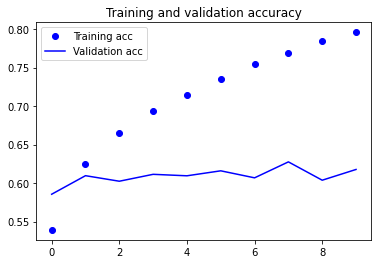

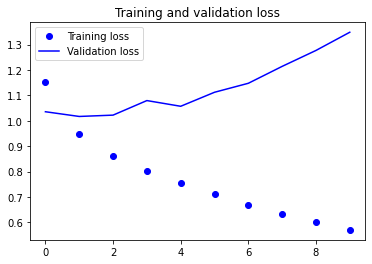

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_1.h5')
model.save('text_model_gLove200d_1.h5')

### gLove twitter 200d #2 unfrozen + reg(0.001) (not saved)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 130s 10ms/step - loss: 1.1930 - acc: 0.5361 - val_loss: 1.0704 - val_acc: 0.5880
Epoch 2/10
13614/13614 [==============================] - 135s 10ms/step - loss: 0.9865 - acc: 0.6227 - val_loss: 1.0517 - val_acc: 0.6083
Epoch 3/10
13614/13614 [==============================] - 134s 10ms/step - loss: 0.9216 - acc: 0.6561 - val_loss: 1.0662 - val_acc: 0.6134
Epoch 4/10
13614/13614 [==============================] - 134s 10ms/step - loss: 0.8850 - acc: 0.6832 - val_loss: 1.1348 - val_acc: 0.5887
Epoch 5/10
13614/13614 [==============================] - 135s 10ms/step - loss: 0.8600 - acc: 0.7017 - val_loss: 1.1558 - val_acc: 0.6128
Epoch 6/10
13614/13614 [==============================] - 135s 10ms/step - loss: 0.8418 - acc: 0.7181 - val_loss: 1.1914 - val_acc: 0.5924
Epoch 7/10
13614/13614 [==============================] - 134s 10ms/step - loss: 0.8262 - acc: 0.7315 - val_loss: 1.2024 - val_acc: 0.6103
Epoch 8/10
13614/13614 [===

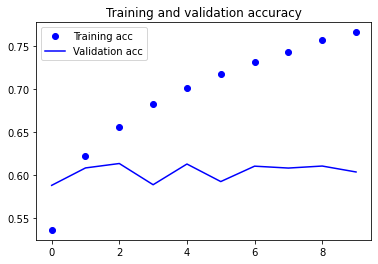

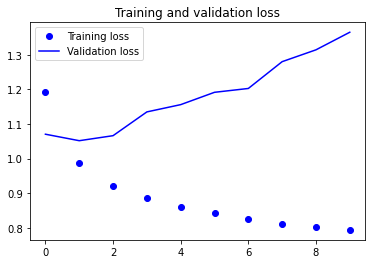

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + reg(0.01) (not saved)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                217632    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                217632    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 115s 8ms/step - loss: 1.3138 - acc: 0.5268 - val_loss: 1.1933 - val_acc: 0.5840
Epoch 2/10
13614/13614 [==============================] - 134s 10ms/step - loss: 1.1278 - acc: 0.6000 - val_loss: 1.1585 - val_acc: 0.5899
Epoch 3/10
13614/13614 [==============================] - 133s 10ms/step - loss: 1.1032 - acc: 0.6190 - val_loss: 1.1669 - val_acc: 0.5933
Epoch 4/10
13614/13614 [==============================] - 133s 10ms/step - loss: 1.0921 - acc: 0.6315 - val_loss: 1.1637 - val_acc: 0.6065
Epoch 5/10
13614/13614 [==============================] - 133s 10ms/step - loss: 1.0826 - acc: 0.6452 - val_loss: 1.1839 - val_acc: 0.6022
Epoch 6/10
13614/13614 [==============================] - 133s 10ms/step - loss: 1.0744 - acc: 0.6559 - val_loss: 1.1954 - val_acc: 0.6143
Epoch 7/10
13614/13614 [==============================] - 135s 10ms/step - loss: 1.0671 - acc: 0.6658 - val_loss: 1.2073 - val_acc: 0.6166
Epoch 8/10
13614/13614 [====

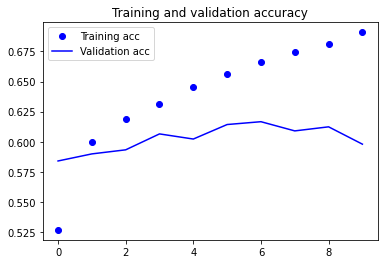

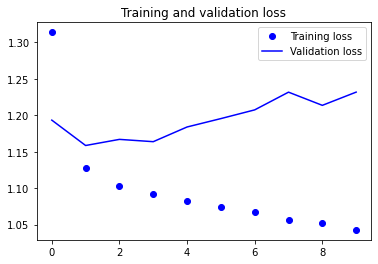

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_3.h5')
model.save('text_model_gLove200d_3.h5')

### gLove twitter 200d #2 unfrozen + reg(0.02) + dropout 0.5 + 25e (not saved)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 200)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                217632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
____________________________________________

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 200)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                217632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 2,217,797
Trainable params: 2,217,797
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/20
13614/13614 [==============================] - 132s 10ms/step - loss: 1.3822 - acc: 0.4885 - val_loss: 1.1730 - val_acc: 0.5749
Epoch 2/20
13614/13614 [==============================] - 127s 9ms/step - loss: 1.1953 - acc: 0.5579 - val_loss: 1.1114 - val_acc: 0.5964
Epoch 3/20
13614/13614 [==============================] - 120s 9ms/step - loss: 1.1621 - acc: 0.5679 - val_loss: 1.1126 - val_acc: 0.5858
Epoch 4/20
13614/13614 [==============================] - 121s 9ms/step - loss: 1.1447 - acc: 0.5779 - val_loss: 1.1046 - val_acc: 0.5947
Epoch 5/20
13614/13614 [==============================] - 120s 9ms/step - loss: 1.1341 - acc: 0.5813 - val_loss: 1.0930 - val_acc: 0.6100
Epoch 6/20
13614/13614 [==============================] - 121s 9ms/step - loss: 1.1322 - acc: 0.5852 - val_loss: 1.1129 - val_acc: 0.5986
Epoch 7/20
13614/13614 [==============================] - 120s 9ms/step - loss: 1.1299 - acc: 0.5905 - val_loss: 1.1191 - val_acc: 0.5801
Epoch 8/20
13614/13614 [=========

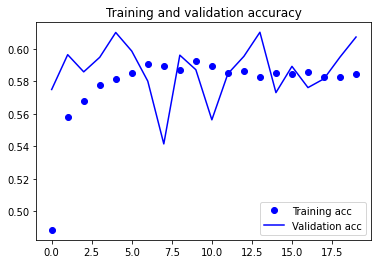

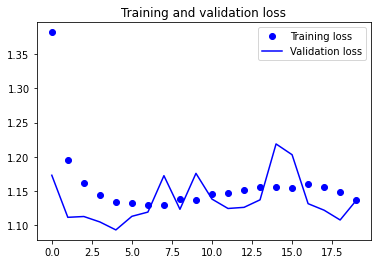

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128  (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 3s 14ms/step - loss: 1.2913 - acc: 0.4806 - val_loss: 1.1661 - val_acc: 0.5425
Epoch 2/10
213/213 [==============================] - 3s 13ms/step - loss: 1.0853 - acc: 0.5751 - val_loss: 1.0984 - val_acc: 0.5658
Epoch 3/10
213/213 [==============================] - 3s 13ms/step - loss: 0.9764 - acc: 0.6251 - val_loss: 1.0688 - val_acc: 0.5746
Epoch 4/10
213/213 [==============================] - 3s 13ms/step - loss: 0.8882 - acc: 0.6681 - val_loss: 1.0399 - val_acc: 0.5946
Epoch 5/10
213/213 [==============================] - 3s 13ms/step - loss: 0.8068 - acc: 0.7040 - val_loss: 1.0214 - val_acc: 0.6066
Epoch 6/10
213/213 [==============================] - 3s 13ms/step - loss: 0.7307 - acc: 0.7388 - val_loss: 1.0102 - val_acc: 0.6135
Epoch 7/10
213/213 [==============================] - 3s 13ms/step - loss: 0.6608 - acc: 0.7681 - val_loss: 0.9976 - val_acc: 0.6160
Epoch 8/10
213/213 [==============================] - 3s 13ms/step - 

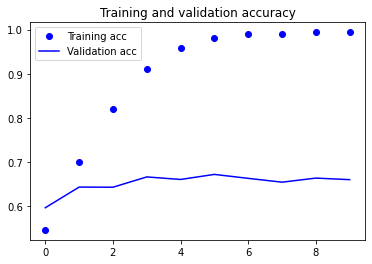

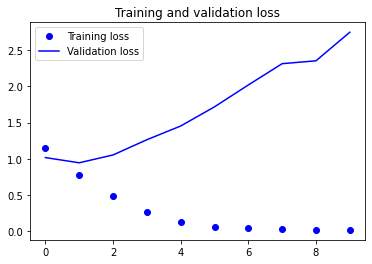

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + 1e-3 (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1741056   
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
____________________________________________

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1741056   
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 3s 13ms/step - loss: 1.1445 - acc: 0.5456 - val_loss: 1.0172 - val_acc: 0.5959
Epoch 2/10
213/213 [==============================] - 3s 12ms/step - loss: 0.7756 - acc: 0.6994 - val_loss: 0.9455 - val_acc: 0.6428
Epoch 3/10
213/213 [==============================] - 3s 12ms/step - loss: 0.4883 - acc: 0.8193 - val_loss: 1.0534 - val_acc: 0.6425
Epoch 4/10
213/213 [==============================] - 3s 14ms/step - loss: 0.2635 - acc: 0.9105 - val_loss: 1.2634 - val_acc: 0.6658
Epoch 5/10
213/213 [==============================] - 3s 14ms/step - loss: 0.1299 - acc: 0.9593 - val_loss: 1.4523 - val_acc: 0.6601
Epoch 6/10
213/213 [==============================] - 3s 13ms/step - loss: 0.0666 - acc: 0.9806 - val_loss: 1.7167 - val_acc: 0.6716
Epoch 7/10
213/213 [==============================] - 3s 13ms/step - loss: 0.0404 - acc: 0.9891 - val_loss: 2.0179 - val_acc: 0.6626
Epoch 8/10
213/213 [==============================] - 3s 13ms/step - 

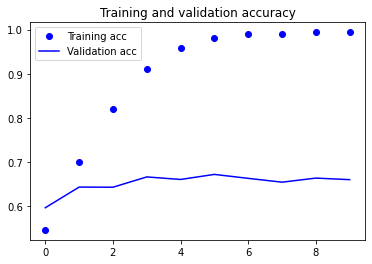

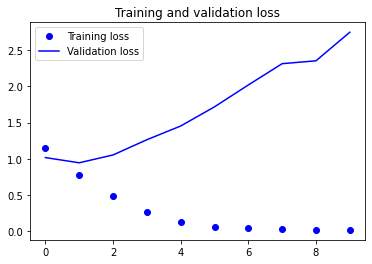

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + 1e-3 + Reg + Drop (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 3s 13ms/step - loss: 1.7829 - acc: 0.5085 - val_loss: 1.3654 - val_acc: 0.5676
Epoch 2/10
213/213 [==============================] - 3s 12ms/step - loss: 1.3511 - acc: 0.5725 - val_loss: 1.3740 - val_acc: 0.5670
Epoch 3/10
213/213 [==============================] - 3s 12ms/step - loss: 1.2784 - acc: 0.6074 - val_loss: 1.2692 - val_acc: 0.6135
Epoch 4/10
213/213 [==============================] - 3s 14ms/step - loss: 1.2330 - acc: 0.6372 - val_loss: 1.2616 - val_acc: 0.6127
Epoch 5/10
213/213 [==============================] - 3s 15ms/step - loss: 1.1863 - acc: 0.6597 - val_loss: 1.2596 - val_acc: 0.6257
Epoch 6/10
213/213 [==============================] - 3s 14ms/step - loss: 1.1491 - acc: 0.6751 - val_loss: 1.2770 - val_acc: 0.6276
Epoch 7/10
213/213 [==============================] - 3s 14ms/step - loss: 1.1121 - acc: 0.6977 - val_loss: 1.2762 - val_acc: 0.6246
Epoch 8/10
213/213 [==============================] - 3s 14ms/step - 

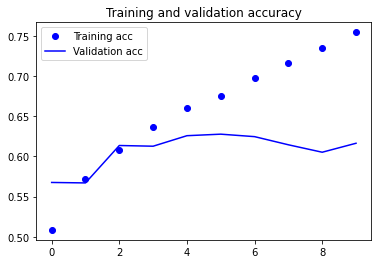

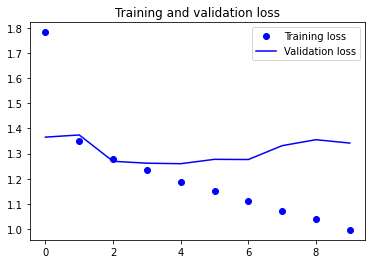

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + 1e-3 + ^Reg + Drop (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 3s 14ms/step - loss: 2.8278 - acc: 0.4745 - val_loss: 1.5659 - val_acc: 0.5405
Epoch 2/10
213/213 [==============================] - 3s 13ms/step - loss: 1.5688 - acc: 0.5234 - val_loss: 1.5043 - val_acc: 0.5566
Epoch 3/10
213/213 [==============================] - 3s 13ms/step - loss: 1.5290 - acc: 0.5434 - val_loss: 1.4715 - val_acc: 0.5749
Epoch 4/10
213/213 [==============================] - 3s 13ms/step - loss: 1.4875 - acc: 0.5626 - val_loss: 1.4722 - val_acc: 0.5811
Epoch 5/10
213/213 [==============================] - 3s 13ms/step - loss: 1.4530 - acc: 0.5792 - val_loss: 1.4861 - val_acc: 0.5733
Epoch 6/10
213/213 [==============================] - 3s 14ms/step - loss: 1.4317 - acc: 0.5906 - val_loss: 1.4433 - val_acc: 0.5815
Epoch 7/10
213/213 [==============================] - 3s 14ms/step - loss: 1.4093 - acc: 0.6039 - val_loss: 1.4796 - val_acc: 0.5729
Epoch 8/10
213/213 [==============================] - 3s 14ms/step - 

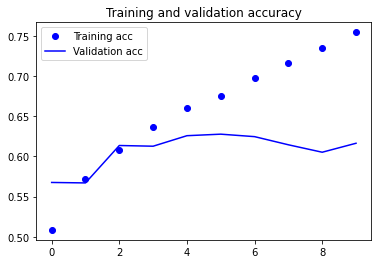

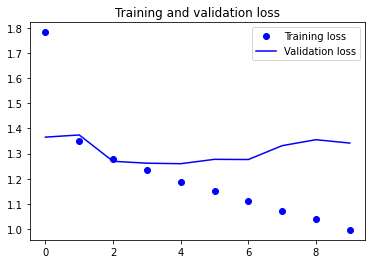

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + Adam 1e-3 + ^Reg + Drop (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers
model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 7s 32ms/step - loss: 3.5826 - acc: 0.4709 - val_loss: 1.5253 - val_acc: 0.5322
Epoch 2/10
213/213 [==============================] - 7s 31ms/step - loss: 1.5330 - acc: 0.5385 - val_loss: 1.4835 - val_acc: 0.5593
Epoch 3/10
213/213 [==============================] - 7s 32ms/step - loss: 1.5018 - acc: 0.5707 - val_loss: 1.5160 - val_acc: 0.5774
Epoch 4/10
213/213 [==============================] - 7s 32ms/step - loss: 1.4736 - acc: 0.5982 - val_loss: 1.4749 - val_acc: 0.5875
Epoch 5/10
213/213 [==============================] - 7s 32ms/step - loss: 1.4445 - acc: 0.6268 - val_loss: 1.5281 - val_acc: 0.5824
Epoch 6/10
213/213 [==============================] - 7s 32ms/step - loss: 1.4176 - acc: 0.6445 - val_loss: 1.4907 - val_acc: 0.5939
Epoch 7/10
213/213 [==============================] - 7s 32ms/step - loss: 1.3840 - acc: 0.6640 - val_loss: 1.5564 - val_acc: 0.6053
Epoch 8/10
213/213 [==============================] - 7s 31ms/step - 

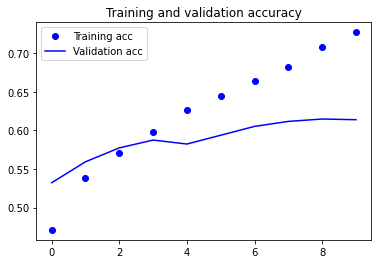

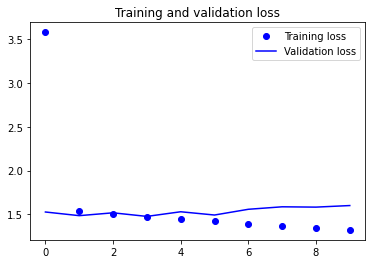

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + SGD 1e-3 (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 2s 8ms/step - loss: 1.5288 - acc: 0.3296 - val_loss: 1.4593 - val_acc: 0.4232
Epoch 2/30
213/213 [==============================] - 2s 7ms/step - loss: 1.4517 - acc: 0.4141 - val_loss: 1.4384 - val_acc: 0.4288
Epoch 3/30
213/213 [==============================] - 2s 7ms/step - loss: 1.4371 - acc: 0.4194 - val_loss: 1.4284 - val_acc: 0.4311
Epoch 4/30
213/213 [==============================] - 2s 7ms/step - loss: 1.4266 - acc: 0.4217 - val_loss: 1.4198 - val_acc: 0.4311
Epoch 5/30
213/213 [==============================] - 2s 7ms/step - loss: 1.4164 - acc: 0.4237 - val_loss: 1.4107 - val_acc: 0.4321
Epoch 6/30
213/213 [==============================] - 1s 7ms/step - loss: 1.4059 - acc: 0.4265 - val_loss: 1.4011 - val_acc: 0.4351
Epoch 7/30
213/213 [==============================] - 1s 7ms/step - loss: 1.3948 - acc: 0.4292 - val_loss: 1.3904 - val_acc: 0.4398
Epoch 8/30
213/213 [==============================] - 1s 7ms/step - loss: 1.

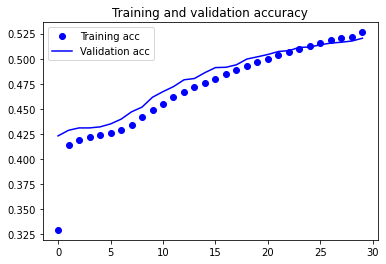

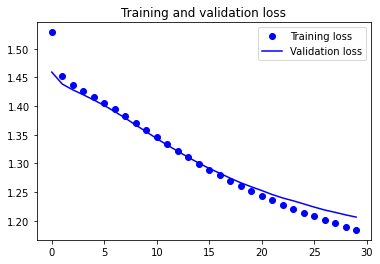

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + SGD 2e-5 (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 2s 7ms/step - loss: 1.6001 - acc: 0.3089 - val_loss: 1.5993 - val_acc: 0.3261
Epoch 2/30
213/213 [==============================] - 1s 7ms/step - loss: 1.5988 - acc: 0.3319 - val_loss: 1.5979 - val_acc: 0.3444
Epoch 3/30
213/213 [==============================] - 1s 7ms/step - loss: 1.5975 - acc: 0.3527 - val_loss: 1.5966 - val_acc: 0.3640
Epoch 4/30
213/213 [==============================] - 1s 7ms/step - loss: 1.5962 - acc: 0.3704 - val_loss: 1.5952 - val_acc: 0.3806
Epoch 5/30
213/213 [==============================] - 1s 7ms/step - loss: 1.5948 - acc: 0.3844 - val_loss: 1.5937 - val_acc: 0.3948
Epoch 6/30
213/213 [==============================] - 1s 7ms/step - loss: 1.5934 - acc: 0.3944 - val_loss: 1.5922 - val_acc: 0.4075
Epoch 7/30
213/213 [==============================] - 1s 7ms/step - loss: 1.5919 - acc: 0.4013 - val_loss: 1.5907 - val_acc: 0.4113
Epoch 8/30
213/213 [==============================] - 1s 7ms/step - loss: 1.

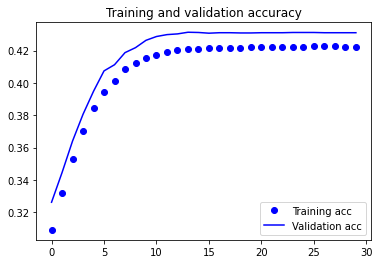

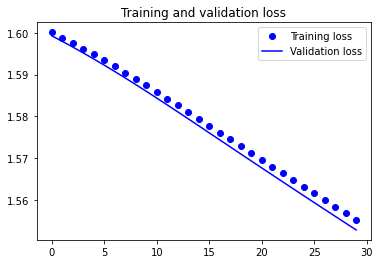

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + SGD 1e-3, 0.9 (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 3,749,445
Trainable params: 3,749,445
Non-trainable params: 0
______________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 1s 7ms/step - loss: 1.4319 - acc: 0.4102 - val_loss: 1.3682 - val_acc: 0.4348
Epoch 2/30
213/213 [==============================] - 1s 6ms/step - loss: 1.3315 - acc: 0.4519 - val_loss: 1.2922 - val_acc: 0.4813
Epoch 3/30
213/213 [==============================] - 1s 6ms/step - loss: 1.2588 - acc: 0.4930 - val_loss: 1.2333 - val_acc: 0.5115
Epoch 4/30
213/213 [==============================] - 1s 6ms/step - loss: 1.2009 - acc: 0.5196 - val_loss: 1.1951 - val_acc: 0.5288
Epoch 5/30
213/213 [==============================] - 1s 6ms/step - loss: 1.1565 - acc: 0.5397 - val_loss: 1.1727 - val_acc: 0.5373
Epoch 6/30
213/213 [==============================] - 1s 6ms/step - loss: 1.1224 - acc: 0.5558 - val_loss: 1.1500 - val_acc: 0.5486
Epoch 7/30
213/213 [==============================] - 1s 6ms/step - loss: 1.0908 - acc: 0.5690 - val_loss: 1.1339 - val_acc: 0.5496
Epoch 8/30
213/213 [==============================] - 1s 6ms/step - loss: 1.

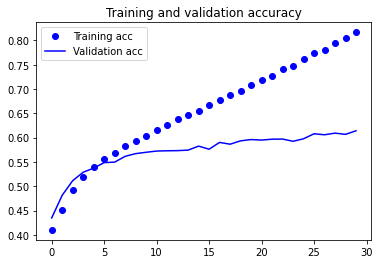

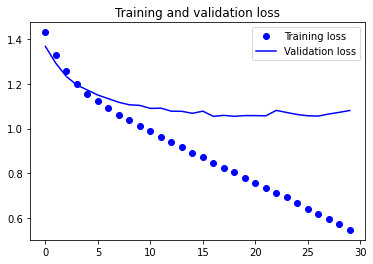

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + SGD 1e-3, 0.9 + Reg + Drop(not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 2s 7ms/step - loss: 35.6827 - acc: 0.4106 - val_loss: 22.8875 - val_acc: 0.4316
Epoch 2/30
213/213 [==============================] - 1s 7ms/step - loss: 15.7880 - acc: 0.4251 - val_loss: 10.3671 - val_acc: 0.4387
Epoch 3/30
213/213 [==============================] - 1s 7ms/step - loss: 7.3885 - acc: 0.4492 - val_loss: 5.0919 - val_acc: 0.4731
Epoch 4/30
213/213 [==============================] - 1s 7ms/step - loss: 3.8468 - acc: 0.4831 - val_loss: 2.8687 - val_acc: 0.5175
Epoch 5/30
213/213 [==============================] - 1s 7ms/step - loss: 2.3535 - acc: 0.5028 - val_loss: 1.9322 - val_acc: 0.5322
Epoch 6/30
213/213 [==============================] - 1s 7ms/step - loss: 1.7166 - acc: 0.5206 - val_loss: 1.5357 - val_acc: 0.5259
Epoch 7/30
213/213 [==============================] - 1s 7ms/step - loss: 1.4481 - acc: 0.5231 - val_loss: 1.3581 - val_acc: 0.5449
Epoch 8/30
213/213 [==============================] - 1s 7ms/step - loss

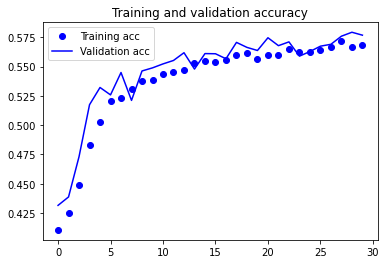

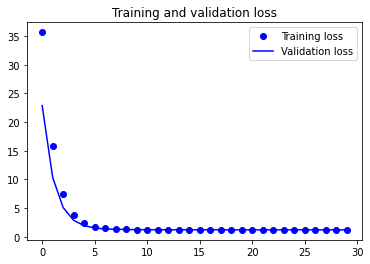

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + SGD 1e-3, 0.9 + < Reg + Drop(not saved) + 60e

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/60
213/213 [==============================] - 1s 7ms/step - loss: 6.2117 - acc: 0.3939 - val_loss: 5.9484 - val_acc: 0.4308
Epoch 2/60
213/213 [==============================] - 1s 6ms/step - loss: 5.7604 - acc: 0.4252 - val_loss: 5.5431 - val_acc: 0.4374
Epoch 3/60
213/213 [==============================] - 1s 6ms/step - loss: 5.3636 - acc: 0.4370 - val_loss: 5.1639 - val_acc: 0.4556
Epoch 4/60
213/213 [==============================] - 1s 6ms/step - loss: 5.0008 - acc: 0.4539 - val_loss: 4.8060 - val_acc: 0.4766
Epoch 5/60
213/213 [==============================] - 1s 6ms/step - loss: 4.6653 - acc: 0.4770 - val_loss: 4.4826 - val_acc: 0.5047
Epoch 6/60
213/213 [==============================] - 1s 7ms/step - loss: 4.3538 - acc: 0.4961 - val_loss: 4.1900 - val_acc: 0.5197
Epoch 7/60
213/213 [==============================] - 1s 7ms/step - loss: 4.0719 - acc: 0.5120 - val_loss: 3.9230 - val_acc: 0.5319
Epoch 8/60
213/213 [==============================] - 1s 7ms/step - loss: 3.

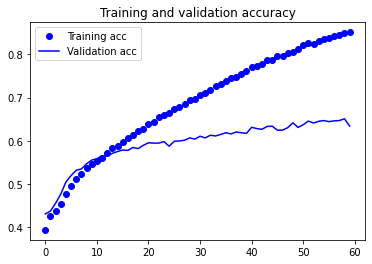

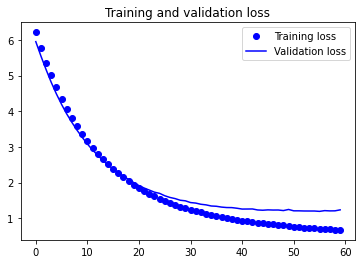

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 32 + SGD 1e-3, 0.9 + < Reg + Drop(not saved) + 20e

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
851/851 [==============================] - 4s 5ms/step - loss: 5.6000 - acc: 0.4221 - val_loss: 4.8291 - val_acc: 0.4628
Epoch 2/20
851/851 [==============================] - 4s 5ms/step - loss: 4.2753 - acc: 0.4791 - val_loss: 3.7259 - val_acc: 0.5257
Epoch 3/20
851/851 [==============================] - 4s 5ms/step - loss: 3.3465 - acc: 0.5197 - val_loss: 2.9754 - val_acc: 0.5473
Epoch 4/20
851/851 [==============================] - 4s 5ms/step - loss: 2.6893 - acc: 0.5403 - val_loss: 2.4467 - val_acc: 0.5516
Epoch 5/20
851/851 [==============================] - 4s 5ms/step - loss: 2.2253 - acc: 0.5628 - val_loss: 2.0479 - val_acc: 0.5731
Epoch 6/20
851/851 [==============================] - 4s 5ms/step - loss: 1.8918 - acc: 0.5734 - val_loss: 1.8054 - val_acc: 0.5676
Epoch 7/20
851/851 [==============================] - 4s 5ms/step - loss: 1.6584 - acc: 0.5884 - val_loss: 1.6008 - val_acc: 0.5836
Epoch 8/20
851/851 [==============================] - 4s 5ms/step - loss: 1.

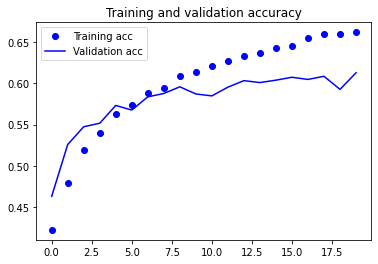

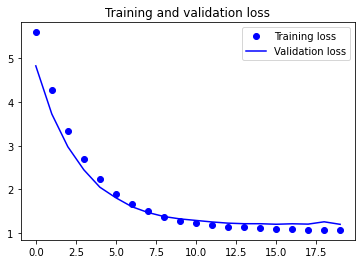

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2 unfrozen + lstm 200 + batch 128 + SGD 1e-3, 0.9 + < Reg + Drop + 20e

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1741056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 1s 7ms/step - loss: 6.1863 - acc: 0.4063 - val_loss: 5.9251 - val_acc: 0.4330
Epoch 2/20
213/213 [==============================] - 1s 6ms/step - loss: 5.7286 - acc: 0.4357 - val_loss: 5.4964 - val_acc: 0.4526
Epoch 3/20
213/213 [==============================] - 1s 6ms/step - loss: 5.3273 - acc: 0.4569 - val_loss: 5.1120 - val_acc: 0.4863
Epoch 4/20
213/213 [==============================] - 1s 7ms/step - loss: 4.9573 - acc: 0.4796 - val_loss: 4.7620 - val_acc: 0.5063
Epoch 5/20
213/213 [==============================] - 1s 7ms/step - loss: 4.6242 - acc: 0.4960 - val_loss: 4.4472 - val_acc: 0.5176
Epoch 6/20
213/213 [==============================] - 1s 7ms/step - loss: 4.3188 - acc: 0.5113 - val_loss: 4.1665 - val_acc: 0.5276
Epoch 7/20
213/213 [==============================] - 1s 6ms/step - loss: 4.0441 - acc: 0.5228 - val_loss: 3.9068 - val_acc: 0.5389
Epoch 8/20
213/213 [==============================] - 1s 6ms/step - loss: 3.

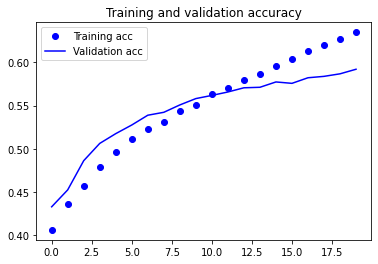

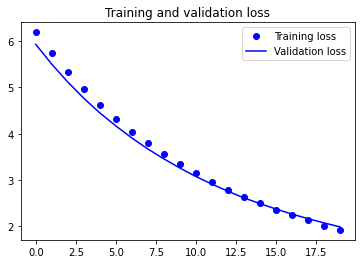

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2.h5')
model.save('text_model_gLove200d_2.h5')

### gLove twitter 200d #2_1 unfrozen + lstm 200 + batch 128 + SGD 1e-3, 0.9 + < Reg + Drop + 40e

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1741056   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1741056   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 1s 7ms/step - loss: 6.1957 - acc: 0.4001 - val_loss: 5.9233 - val_acc: 0.4367
Epoch 2/50
213/213 [==============================] - 1s 6ms/step - loss: 5.7345 - acc: 0.4357 - val_loss: 5.4999 - val_acc: 0.4583
Epoch 3/50
213/213 [==============================] - 1s 6ms/step - loss: 5.3379 - acc: 0.4523 - val_loss: 5.1198 - val_acc: 0.4768
Epoch 4/50
213/213 [==============================] - 1s 6ms/step - loss: 4.9730 - acc: 0.4759 - val_loss: 4.7757 - val_acc: 0.4947
Epoch 5/50
213/213 [==============================] - 1s 6ms/step - loss: 4.6410 - acc: 0.4900 - val_loss: 4.4654 - val_acc: 0.5071
Epoch 6/50
213/213 [==============================] - 1s 6ms/step - loss: 4.3422 - acc: 0.4996 - val_loss: 4.1812 - val_acc: 0.5173
Epoch 7/50
213/213 [==============================] - 1s 6ms/step - loss: 4.0644 - acc: 0.5129 - val_loss: 3.9222 - val_acc: 0.5285
Epoch 8/50
213/213 [==============================] - 1s 7ms/step - loss: 3.

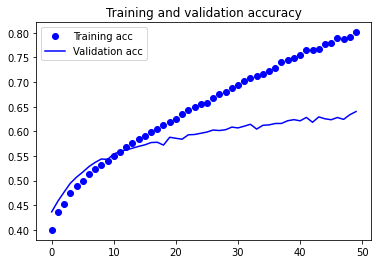

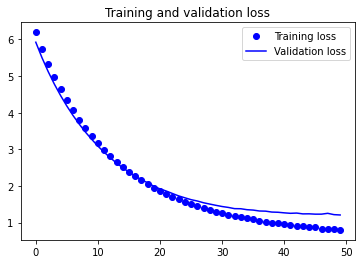

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2_1.h5')
model.save('text_model_gLove200d_2_1.h5')

### gLove twitter 200d #2_2 unfrozen + lstm 200 + batch 128 + SGD 1e-3, 0.9 + < Reg + Drop + 100e

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1741056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1741056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/100
213/213 [==============================] - 2s 7ms/step - loss: 6.1983 - acc: 0.4052 - val_loss: 5.9398 - val_acc: 0.4348
Epoch 2/100
213/213 [==============================] - 1s 7ms/step - loss: 5.7456 - acc: 0.4296 - val_loss: 5.5223 - val_acc: 0.4598
Epoch 3/100
213/213 [==============================] - 1s 6ms/step - loss: 5.3445 - acc: 0.4488 - val_loss: 5.1310 - val_acc: 0.4862
Epoch 4/100
213/213 [==============================] - 1s 6ms/step - loss: 4.9734 - acc: 0.4686 - val_loss: 4.7758 - val_acc: 0.4991
Epoch 5/100
213/213 [==============================] - 1s 7ms/step - loss: 4.6388 - acc: 0.4867 - val_loss: 4.4533 - val_acc: 0.5151
Epoch 6/100
213/213 [==============================] - 1s 6ms/step - loss: 4.3303 - acc: 0.5063 - val_loss: 4.1687 - val_acc: 0.5292
Epoch 7/100
213/213 [==============================] - 1s 7ms/step - loss: 4.0525 - acc: 0.5197 - val_loss: 3.9029 - val_acc: 0.5361
Epoch 8/100
213/213 [==============================] - 1s 6ms/step - 

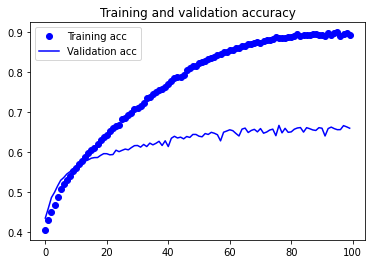

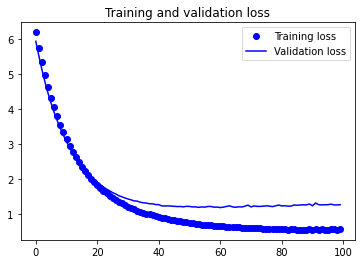

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_2_2.h5')
model.save('text_model_gLove200d_2_2.h5')

### gLove twitter 200d #3

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              6964224   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              6964224   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 2s 9ms/step - loss: 172.3489 - acc: 0.4044 - val_loss: 108.6991 - val_acc: 0.4311
Epoch 2/50
213/213 [==============================] - 2s 8ms/step - loss: 73.2948 - acc: 0.4225 - val_loss: 46.4117 - val_acc: 0.4311
Epoch 3/50
213/213 [==============================] - 2s 8ms/step - loss: 31.5663 - acc: 0.4231 - val_loss: 20.2801 - val_acc: 0.4314
Epoch 4/50
213/213 [==============================] - 2s 8ms/step - loss: 14.0570 - acc: 0.4254 - val_loss: 9.3114 - val_acc: 0.4364
Epoch 5/50
213/213 [==============================] - 2s 8ms/step - loss: 6.7029 - acc: 0.4353 - val_loss: 4.7048 - val_acc: 0.4370
Epoch 6/50
213/213 [==============================] - 2s 8ms/step - loss: 3.6121 - acc: 0.4486 - val_loss: 2.7632 - val_acc: 0.4609
Epoch 7/50
213/213 [==============================] - 2s 8ms/step - loss: 2.3097 - acc: 0.4610 - val_loss: 1.9451 - val_acc: 0.4771
Epoch 8/50
213/213 [==============================] - 2s 8ms/step -

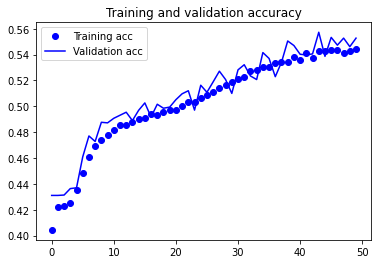

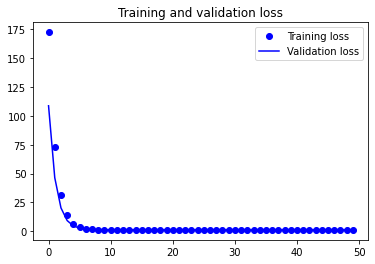

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_3.h5')
model.save('text_model_gLove200d_3.h5')

### gLove twitter 200d #3_1 sgd(1e-4)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)              

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 6800)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              6964224   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-4, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 2s 9ms/step - loss: 238.5101 - acc: 0.3479 - val_loss: 228.4957 - val_acc: 0.4311
Epoch 2/50
213/213 [==============================] - 2s 8ms/step - loss: 219.1167 - acc: 0.4218 - val_loss: 209.8842 - val_acc: 0.4311
Epoch 3/50
213/213 [==============================] - 2s 8ms/step - loss: 201.2803 - acc: 0.4225 - val_loss: 192.8067 - val_acc: 0.4311
Epoch 4/50
213/213 [==============================] - 2s 8ms/step - loss: 184.9124 - acc: 0.4225 - val_loss: 177.1356 - val_acc: 0.4311
Epoch 5/50
213/213 [==============================] - 2s 8ms/step - loss: 169.8921 - acc: 0.4225 - val_loss: 162.7530 - val_acc: 0.4311
Epoch 6/50
213/213 [==============================] - 2s 8ms/step - loss: 156.1045 - acc: 0.4225 - val_loss: 149.5504 - val_acc: 0.4311
Epoch 7/50
213/213 [==============================] - 2s 8ms/step - loss: 143.4481 - acc: 0.4225 - val_loss: 137.4298 - val_acc: 0.4311
Epoch 8/50
213/213 [============================

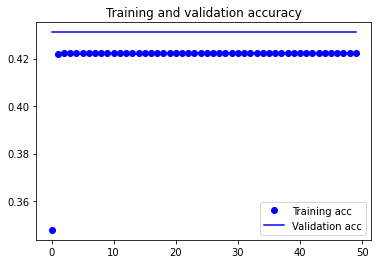

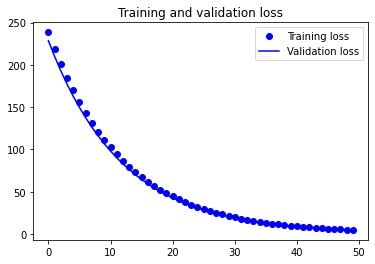

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_3_1.h5')
model.save('text_model_gLove200d_3_1.h5')

### gLove twitter 200d #3_2 SGD(1e-2)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_14 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)              

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_14 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)              

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-2, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 2s 9ms/step - loss: 35.8973 - acc: 0.4184 - val_loss: 1.4090 - val_acc: 0.4327
Epoch 2/50
213/213 [==============================] - 2s 8ms/step - loss: 1.4222 - acc: 0.4462 - val_loss: 1.4059 - val_acc: 0.4542
Epoch 3/50
213/213 [==============================] - 2s 8ms/step - loss: 1.4305 - acc: 0.4572 - val_loss: 1.3744 - val_acc: 0.4931
Epoch 4/50
213/213 [==============================] - 2s 8ms/step - loss: 1.4301 - acc: 0.4657 - val_loss: 1.3939 - val_acc: 0.4896
Epoch 5/50
213/213 [==============================] - 2s 8ms/step - loss: 1.4255 - acc: 0.4754 - val_loss: 1.3898 - val_acc: 0.4988
Epoch 6/50
213/213 [==============================] - 2s 8ms/step - loss: 1.4398 - acc: 0.4783 - val_loss: 1.3886 - val_acc: 0.4991
Epoch 7/50
213/213 [==============================] - 2s 8ms/step - loss: 1.4358 - acc: 0.4789 - val_loss: 1.3876 - val_acc: 0.5044
Epoch 8/50
213/213 [==============================] - 2s 8ms/step - loss: 1

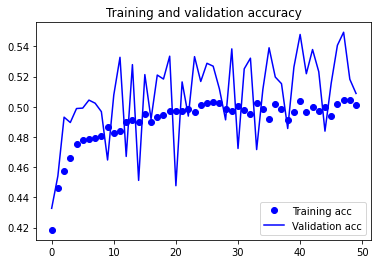

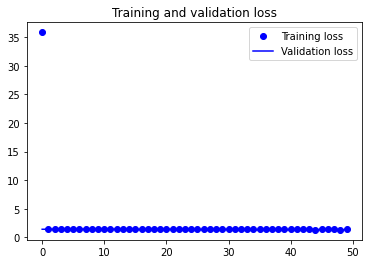

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_3_2.h5')
model.save('text_model_gLove200d_3_2.h5')

### gLove twitter 200d #3_3 500e

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_16 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 512)              

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_16 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 512)              

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/500
213/213 [==============================] - 2s 9ms/step - loss: 172.3229 - acc: 0.4109 - val_loss: 108.6809 - val_acc: 0.4311
Epoch 2/500
213/213 [==============================] - 2s 8ms/step - loss: 73.2777 - acc: 0.4235 - val_loss: 46.3976 - val_acc: 0.4323
Epoch 3/500
213/213 [==============================] - 2s 8ms/step - loss: 31.5540 - acc: 0.4258 - val_loss: 20.2663 - val_acc: 0.4361
Epoch 4/500
213/213 [==============================] - 2s 8ms/step - loss: 14.0437 - acc: 0.4356 - val_loss: 9.2965 - val_acc: 0.4549
Epoch 5/500
213/213 [==============================] - 2s 8ms/step - loss: 6.6933 - acc: 0.4512 - val_loss: 4.6929 - val_acc: 0.4618
Epoch 6/500
213/213 [==============================] - 2s 8ms/step - loss: 3.6038 - acc: 0.4621 - val_loss: 2.7561 - val_acc: 0.4736
Epoch 7/500
213/213 [==============================] - 2s 8ms/step - loss: 2.3052 - acc: 0.4718 - val_loss: 1.9435 - val_acc: 0.4894
Epoch 8/500
213/213 [==============================] - 2s 8m

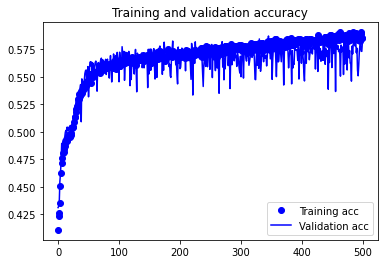

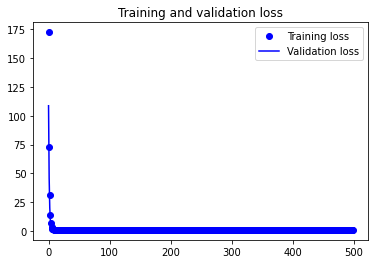

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_3_3.h5')
model.save('text_model_gLove200d_3_3.h5')

### gLove twitter 200d #PRE - 4

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6964224   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           2000000   
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6964224   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-2, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 2s 8ms/step - loss: 1.3001 - acc: 0.4730 - val_loss: 1.1822 - val_acc: 0.5291
Epoch 2/10
213/213 [==============================] - 1s 7ms/step - loss: 1.1113 - acc: 0.5583 - val_loss: 1.1016 - val_acc: 0.5624
Epoch 3/10
213/213 [==============================] - 1s 7ms/step - loss: 0.9715 - acc: 0.6157 - val_loss: 1.0529 - val_acc: 0.5906
Epoch 4/10
213/213 [==============================] - 1s 7ms/step - loss: 0.8354 - acc: 0.6748 - val_loss: 1.0787 - val_acc: 0.5748
Epoch 5/10
213/213 [==============================] - 1s 7ms/step - loss: 0.6932 - acc: 0.7360 - val_loss: 1.0534 - val_acc: 0.6093
Epoch 6/10
213/213 [==============================] - 1s 7ms/step - loss: 0.5350 - acc: 0.8035 - val_loss: 1.1134 - val_acc: 0.6184
Epoch 7/10
213/213 [==============================] - 1s 7ms/step - loss: 0.3891 - acc: 0.8602 - val_loss: 1.3093 - val_acc: 0.6204
Epoch 8/10
213/213 [==============================] - 1s 7ms/step - loss: 0.

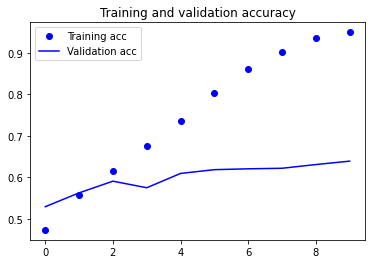

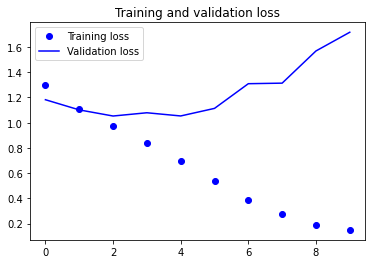

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_PRE4.h5')
model.save('text_model_gLove200d_PRE4.h5')

### gLove twitter 200d #4

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_18 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)             

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_18 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)             

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-2, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/500
213/213 [==============================] - 2s 10ms/step - loss: 3.7792 - acc: 0.4185 - val_loss: 3.5823 - val_acc: 0.4465
Epoch 2/500
213/213 [==============================] - 2s 8ms/step - loss: 3.4621 - acc: 0.4754 - val_loss: 3.2827 - val_acc: 0.5269
Epoch 3/500
213/213 [==============================] - 2s 8ms/step - loss: 3.2047 - acc: 0.5141 - val_loss: 3.0585 - val_acc: 0.5457
Epoch 4/500
213/213 [==============================] - 2s 8ms/step - loss: 2.9782 - acc: 0.5457 - val_loss: 2.8847 - val_acc: 0.5668
Epoch 5/500
213/213 [==============================] - 2s 8ms/step - loss: 2.7803 - acc: 0.5697 - val_loss: 2.7027 - val_acc: 0.5770
Epoch 6/500
213/213 [==============================] - 2s 8ms/step - loss: 2.6003 - acc: 0.5909 - val_loss: 2.5548 - val_acc: 0.5862
Epoch 7/500
213/213 [==============================] - 2s 8ms/step - loss: 2.4362 - acc: 0.6093 - val_loss: 2.4255 - val_acc: 0.5991
Epoch 8/500
213/213 [==============================] - 2s 8ms/step -

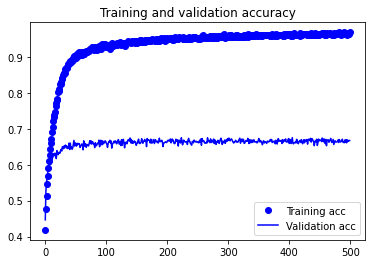

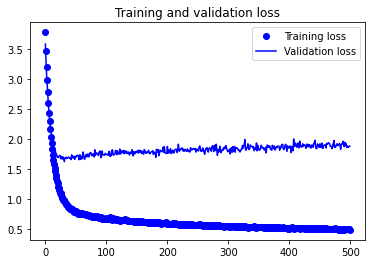

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_4.h5')
model.save('text_model_gLove200d_4.h5')

## Model - maxwords: 100k

In [ ]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 100000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

def vectorize_sequences(sequences, dimension=5):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

X = pad_sequences(sequences, maxlen=max_len)
y = vectorize_sequences(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546, 5)


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### gLove twitter 200d #1 unfrozen (not saved)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           20000000  
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 20,217,797
Trainable params: 20,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 200)           20000000  
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                217632    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 20,217,797
Trainable params: 20,217,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 22s 105ms/step - loss: 1.3499 - acc: 0.4520 - val_loss: 1.2579 - val_acc: 0.4971
Epoch 2/10
213/213 [==============================] - 22s 104ms/step - loss: 1.1949 - acc: 0.5251 - val_loss: 1.1707 - val_acc: 0.5376
Epoch 3/10
213/213 [==============================] - 22s 105ms/step - loss: 1.1093 - acc: 0.5609 - val_loss: 1.1248 - val_acc: 0.5577
Epoch 4/10
213/213 [==============================] - 22s 104ms/step - loss: 1.0489 - acc: 0.5895 - val_loss: 1.0925 - val_acc: 0.5699
Epoch 5/10
213/213 [==============================] - 22s 105ms/step - loss: 0.9991 - acc: 0.6108 - val_loss: 1.0685 - val_acc: 0.5793
Epoch 6/10
213/213 [==============================] - 22s 105ms/step - loss: 0.9549 - acc: 0.6295 - val_loss: 1.0476 - val_acc: 0.5896
Epoch 7/10
213/213 [==============================] - 22s 104ms/step - loss: 0.9153 - acc: 0.6475 - val_loss: 1.0297 - val_acc: 0.5936
Epoch 8/10
213/213 [==============================] - 2

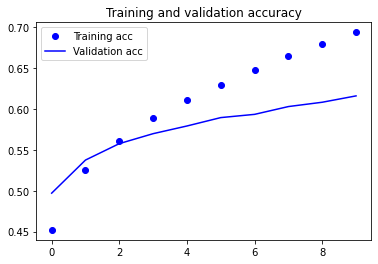

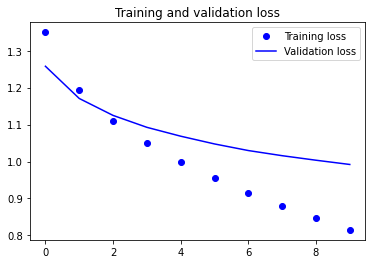

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_1.h5')
model.save('text_model_gLove200d_1.h5')

## Step 3 – Evaluate the Model using Testing Data 

In [ ]:
from tensorflow.keras import models
# Model #1 (replicate where necessary for other models)
#model.load_weights('text_model_1.h5')

model = models.load_model(model_path+'text_model_gLove200d_4.h5')
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

67/67 [==============================] - 0s 4ms/step - loss: 1.9329 - acc: 0.6517
test loss, test acc: [1.9329394102096558, 0.6517038941383362]


In [ ]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [ ]:
#model.load_weights('text_model_best.h5')

model = models.load_model(model_path+'text_model_gLove200d_4.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

LOL


In [ ]:
# convert the user input into numeric tensor
import pandas as pd
def prediction(model, text_array, items_list):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = items_list)
    result = items_list[np.argmax(prob)]
    return pro_df, result

sequences = tokenizer.texts_to_sequences(text_input)
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# show the model output using predict function
prediction(model, data, emoji_dictionary)

(          0         1         2         3         4
 0  0.000018  0.999931  0.000003  0.000021  0.000027, '😂')